In [1]:
library(rvest)
library(textTinyR)
library(syuzhet)

Warning message:
"package 'rvest' was built under R version 3.6.3"Warning message:
"package 'textTinyR' was built under R version 3.6.3"Loading required package: Matrix
Warning message:
"package 'Matrix' was built under R version 3.6.3"Warning message:
"package 'syuzhet' was built under R version 3.6.3"

In [2]:
amazon_url <- 'https://www.amazon.in/'
reviews_url <- 'https://www.amazon.in/Apple-iPhone-Pro-Max-128GB/product-reviews/B09G9HR5GX'

In [3]:
# Create empty lists
customer_names <- c()
review_titles <- c()
ratings <- c()
review_contents <- c()

In [4]:
# Request Amazon website to get the reviews
response <- read_html(reviews_url)
response

{html_document}
<html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo">
[1] <head>\n<meta http-equiv="Content-Type" content="text/html; charset=UTF-8 ...
[2] <body>\n<span id="cr-state-object" data-state='{"asin":"B09G9HR5GX","devi ...

In [5]:
# Extract information from the reviews
reviews <- response %>%
  html_nodes(".a-section.review.aok-relative")

In [6]:
for (review in reviews) {
  # Extract customer name
  customer_name <- html_node(review, ".a-profile-name")
  customer_names <- c(customer_names, ifelse(!is.null(customer_name), html_text(customer_name), NA))

  # Extract review title
  review_title <- html_node(review, "[data-hook='review-title']")
  review_titles <- c(review_titles, ifelse(!is.null(review_title), html_text(review_title), NA))

  # Extract rating
  rating <- html_node(review, ".review-rating")
  ratings <- c(ratings, ifelse(!is.null(rating), html_text(rating), NA))

  # Extract review content
  review_content <- html_node(review, "[data-hook='review-body']")
  review_contents <- c(review_contents, ifelse(!is.null(review_content), html_text(review_content), NA))
}

In [7]:
# Create a data frame
reviews_df <- data.frame(
  Customer_Name = customer_names,
  Review_Title = review_titles,
  Rating = ratings,
  Review_Content = review_contents
)

In [8]:
reviews_df

Customer_Name,Review_Title,Rating,Review_Content
Adhil Mohammed,5.0 out of 5 stars Great Phone and fast delivery by amazon,5.0 out of 5 stars,"i was completely satisfied with amazons delivery, it was safe. the phone is amazing"
DS,5.0 out of 5 stars The best ever phone in the market,5.0 out of 5 stars,I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.
Sudhanshu Singh,5.0 out of 5 stars Superb Phone,5.0 out of 5 stars,"1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premium segments which are using more AI and color combinations. Battery life is also outstanding, with normal use a fully charged can go up to 2 days. Very smooth and fast performance. Just go for it."
Prince Patel,5.0 out of 5 stars Best battery life,5.0 out of 5 stars,"I first purchased iPhone 14 pro then I realized that it drains the battery quickly(Don't have any idea about 14 pro max). Then I sell this phone to the store. Luckily due to the high demand for iPhone 14 pro, I could sell at the same price. Then I purchased 13 pro max. It has been 1 week and I found battery backup is very good. No doubt about other features of the iPhone."
Ayush Kamboj,4.0 out of 5 stars Best Battery. Best Camera. Very smooth. But not value for money.,4.0 out of 5 stars,"Switched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.Cons:1) The price. Got the 512GB pro max for 1.55 lac. and that is not at all value for the amount of money you spend. With no charger!2) Software wise, the notifications are really bad. Android compiles notifications much better. Also, it’s really tricky to transfer Whatsapp and other stuff from an Android."
Govind Madhu,5.0 out of 5 stars All in one smartphone,5.0 out of 5 stars,The best smartphone i have ever used. Great battery life. 12 hours of screen on time. Need to charge once in two days only even with heavy usage. Charging is fast with 30 watt apple charger. Best camera quality. Speakers are excellent. Face unlock is best.Perfect sync with ipad through icloud.This is my first apple phone and i am never going back to android.
Sid Samel,5.0 out of 5 stars Absolutely a stunner,5.0 out of 5 stars,"I was very skeptical about the genuineness of the product that I would receive as it was not available in stock in stores. So, I brought all my gut feeling together and made this purchase. The product was delivered in time. When I opened the box, it was strikingly beautiful. I checked for its authenticity by verifying it from all different ways. Now, most importantly a genuine Apple iPhone 13 pro max phone was in my hand. It works great for me and has a longer battery life than the previous phones that I've had."
albert james,5.0 out of 5 stars Good and genuine product,5.0 out of 5 stars,"Would first like to tell that don’t listen to other comments,those are the people spreading negativityThe retailer and the sel

In [9]:
# Remove spaces
reviews_df <- lapply(reviews_df, function(x) gsub("\\s+", " ", x))

In [10]:
reviews_df

$Customer_Name
 [1] "Adhil Mohammed"  "DS"              "Sudhanshu Singh" "Prince Patel"   
 [5] "Ayush Kamboj"    "Govind Madhu"    "Sid Samel"       "albert james"   
 [9] "Kabir Debbarma"  "Bikesh gupta"   

$Review_Title
 [1] "5.0 out of 5 stars Great Phone and fast delivery by amazon "                                                      
 [2] "5.0 out of 5 stars The best ever phone in the market "                                                            
 [3] "5.0 out of 5 stars Superb Phone "                                                                                 
 [4] "5.0 out of 5 stars Best battery life "                                                                            
 [5] "4.0 out of 5 stars Best Battery. Best Camera. Very smooth. But not value for money. "                             
 [6] "5.0 out of 5 stars All in one smartphone "                                                                        
 [7] "5.0 out of 5 stars Absolutely a stunner "                                                                         
 [8] "5.0 out of 5 stars Good and genuine product "                                                                     
 [9] "3.0 out of 5 stars It’s ok "                                                                                      
[10] "4.0 out of 5 stars The iPhone 13 Pro Max’s stellar cameras, 120Hz +Best cameras in a phone +Superior performance "

$Rating
 [1] "5.0 out of 5 stars" "5.0 out of 5 stars" "5.0 out of 5 stars"
 [4] "5.0 out of 5 stars" "4.0 out of 5 stars" "5.0 out of 5 stars"
 [7] "5.0 out of 5 stars" "5.0 out of 5 stars" "3.0 out of 5 stars"
[10] "4.0 out of 5 stars"

$Review_Content
 [1] " i was completely satisfied with amazons delivery, it was safe. the phone is amazing "                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [2] " I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it. "                                          
 [3] " 1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premium segments which are using more AI and color combinations. Battery life is also outstanding, with normal use a fully charged can go up to 2 days. Very smooth and fast performance. Just go for it. "                                                                                                                                                                                                                                                                                                          
 [4] " I first purchased iPhone 14 pro then I realized that it drains the battery quickly(Don't have any

In [11]:
# Export to CSV
write.csv(reviews_df, "amazon_reviews.csv", row.names = FALSE)

In [12]:
# Read the CSV file
reviews_df <- read.csv("amazon_reviews.csv")

In [13]:
reviews_df

Customer_Name,Review_Title,Rating,Review_Content
Adhil Mohammed,5.0 out of 5 stars Great Phone and fast delivery by amazon,5.0 out of 5 stars,"i was completely satisfied with amazons delivery, it was safe. the phone is amazing"
DS,5.0 out of 5 stars The best ever phone in the market,5.0 out of 5 stars,I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.
Sudhanshu Singh,5.0 out of 5 stars Superb Phone,5.0 out of 5 stars,"1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premium segments which are using more AI and color combinations. Battery life is also outstanding, with normal use a fully charged can go up to 2 days. Very smooth and fast performance. Just go for it."
Prince Patel,5.0 out of 5 stars Best battery life,5.0 out of 5 stars,"I first purchased iPhone 14 pro then I realized that it drains the battery quickly(Don't have any idea about 14 pro max). Then I sell this phone to the store. Luckily due to the high demand for iPhone 14 pro, I could sell at the same price. Then I purchased 13 pro max. It has been 1 week and I found battery backup is very good. No doubt about other features of the iPhone."
Ayush Kamboj,4.0 out of 5 stars Best Battery. Best Camera. Very smooth. But not value for money.,4.0 out of 5 stars,"Switched from Android to iPhone. Here are my pros and cons.Pros:1) The battery life on the Pro Max is just excellent. No android with even a 6000 Mah can beat it, it is that well optimised.2) The camera as you can guess is one of the best if not the best.3) The screen with 120hz feels so smooth. It’s just a different experience. Androids with similar refresh don’t feel so smooth because they are poorly optimised.Cons:1) The price. Got the 512GB pro max for 1.55 lac. and that is not at all value for the amount of money you spend. With no charger!2) Software wise, the notifications are really bad. Android compiles notifications much better. Also, it’s really tricky to transfer Whatsapp and other stuff from an Android."
Govind Madhu,5.0 out of 5 stars All in one smartphone,5.0 out of 5 stars,The best smartphone i have ever used. Great battery life. 12 hours of screen on time. Need to charge once in two days only even with heavy usage. Charging is fast with 30 watt apple charger. Best camera quality. Speakers are excellent. Face unlock is best.Perfect sync with ipad through icloud.This is my first apple phone and i am never going back to android.
Sid Samel,5.0 out of 5 stars Absolutely a stunner,5.0 out of 5 stars,"I was very skeptical about the genuineness of the product that I would receive as it was not available in stock in stores. So, I brought all my gut feeling together and made this purchase. The product was delivered in time. When I opened the box, it was strikingly beautiful. I checked for its authenticity by verifying it from all different ways. Now, most importantly a genuine Apple iPhone 13 pro max phone was in my hand. It works great for me and has a longer battery life than the previous phones that I've had."
albert james,5.0 out of 5 stars Good and genuine product,5.0 out of 5 stars,"Would first like to tell that don’t listen to other comments,those are the people spreading negativityThe retailer and the sel

In [14]:
# User-defined function for text cleaning
clean_text <- function(text) {
  gsub("[^a-zA-Z ]", "", text)
}

In [15]:
# Combine Rating and Review_Content into a new column
reviews_df$Combined_Rating_Content <- paste(reviews_df$Rating, reviews_df$Review_Content, sep = ' ')

In [18]:
# Apply text cleaning
reviews_df$Cleaned_Text <- sapply(reviews_df$Combined_Rating_Content, clean_text)

In [19]:
reviews_df

Customer_Name,Review_Title,Rating,Review_Content,Combined_Rating_Content,Cleaned_Text
Adhil Mohammed,5.0 out of 5 stars Great Phone and fast delivery by amazon,5.0 out of 5 stars,"i was completely satisfied with amazons delivery, it was safe. the phone is amazing","5.0 out of 5 stars i was completely satisfied with amazons delivery, it was safe. the phone is amazing",out of stars i was completely satisfied with amazons delivery it was safe the phone is amazing
DS,5.0 out of 5 stars The best ever phone in the market,5.0 out of 5 stars,I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.,5.0 out of 5 stars I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.,out of stars I have started using iPhone from series and since then this is th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones Camera quality you cant even think of comparing it with any other phone in the world You definitely dont need to carry a FSLR or a video cam after you own this piece You can literally make a professional movie from its cameraThe only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end its gives you the satisfaction nothing else can give you because you own the bestMy suggestion is go for it only if you have the capacity to own it
Sudhanshu Singh,5.0 out of 5 stars Superb Phone,5.0 out of 5 stars,"1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premium segments which are using more AI and color combinations. Battery life is also outstanding, with normal use a fully charged can go up to 2 days. Very smooth and fast performance. Just go for it.","5.0 out of 5 stars 1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premium segments which are using more AI and color combinations. Battery life is also outstanding, with normal use a fully charged can go up to 2 days. Very smooth and fast performance. Just go for it.",out of stars st thing st Look Very good looking phone and feel premium when you hold itA refresh rate of Hz is good to feel on pro max Camera quality is just superb pics from pro max looks more real as compare to other premium segments which are using more AI and color combinations Battery life is also outstanding with normal use a fully charged can go up to days Very smooth and fast performance Just go for it
Prince Patel,5.0 out of 5 st

In [20]:
# Perform sentiment analysis and add a Sentiment_Score column
reviews_df$Sentiment_Score <- sapply(reviews_df$Cleaned_Text, function(text) get_sentiment(text)[1])

In [21]:
# View the resulting dataframe with the new Sentiment_Score column
print(reviews_df)

     Customer_Name
1   Adhil Mohammed
2               DS
3  Sudhanshu Singh
4     Prince Patel
5     Ayush Kamboj
6     Govind Madhu
7        Sid Samel
8     albert james
9   Kabir Debbarma
10    Bikesh gupta
                                                                                                        Review_Title
1                                                        5.0 out of 5 stars Great Phone and fast delivery by amazon 
2                                                              5.0 out of 5 stars The best ever phone in the market 
3                                                                                   5.0 out of 5 stars Superb Phone 
4                                                                              5.0 out of 5 stars Best battery life 
5                               4.0 out of 5 stars Best Battery. Best Camera. Very smooth. But not value for money. 
6                                                                          5.0 out of 5 s

In [22]:
# Ensure that Sentiment_Score is treated as numeric
reviews_df$Sentiment_Score <- as.numeric(as.character(reviews_df$Sentiment_Score))

In [23]:
# Categorize sentiment scores into positive, negative, and neutral
reviews_df$Emotion <- cut(reviews_df$Sentiment_Score, breaks = c(-Inf, -0.2, 0.2, Inf), labels = c("Negative", "Neutral", "Positive"))

In [24]:
reviews_df

Customer_Name,Review_Title,Rating,Review_Content,Combined_Rating_Content,Cleaned_Text,Sentiment_Score,Emotion
Adhil Mohammed,5.0 out of 5 stars Great Phone and fast delivery by amazon,5.0 out of 5 stars,"i was completely satisfied with amazons delivery, it was safe. the phone is amazing","5.0 out of 5 stars i was completely satisfied with amazons delivery, it was safe. the phone is amazing",out of stars i was completely satisfied with amazons delivery it was safe the phone is amazing,3.25,Positive
DS,5.0 out of 5 stars The best ever phone in the market,5.0 out of 5 stars,I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.,5.0 out of 5 stars I have started using iPhone from 5 series and since then this is 7th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones. Camera quality you can’t even think of comparing it with any other phone in the world. You definitely don’t need to carry a FSLR or a video cam after you own this piece. You can literally make a professional movie from its camera.The only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end it’s gives you the satisfaction nothing else can give you because you own the best.My suggestion is go for it only if you have the capacity to own it.,out of stars I have started using iPhone from series and since then this is th iPhone which I upgrade and I must say till date this has got the best battery I have observed in any of my previous iPhones Camera quality you cant even think of comparing it with any other phone in the world You definitely dont need to carry a FSLR or a video cam after you own this piece You can literally make a professional movie from its cameraThe only thing is that you need to shell out hell lot of money to be the owner of this beauty but at the end its gives you the satisfaction nothing else can give you because you own the bestMy suggestion is go for it only if you have the capacity to own it,1.60,Positive
Sudhanshu Singh,5.0 out of 5 stars Superb Phone,5.0 out of 5 stars,"1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premium segments which are using more AI and color combinations. Battery life is also outstanding, with normal use a fully charged can go up to 2 days. Very smooth and fast performance. Just go for it.","5.0 out of 5 stars 1st thing 1st... Look -- Very good looking phone and feel premium when you hold it.A refresh rate of 120Hz is good to feel on 13 pro max. Camera quality is just superb, pics from 13 pro max looks more real as compare to other premium segments which are using more AI and color combinations. Battery life is also outstanding, with normal use a fully charged can go up to 2 days. Very smooth and fast performance. Just go for it.",out of stars st thing st Look Very good looking phone and feel premium when you hold itA refresh rate of Hz is good to feel on pro max Camera quality is just superb pics from pro max looks more real as compare to other premium segments which are using more AI and color combinations Battery life is also outstanding with normal use a fully charged can go up to days Very smooth and fast per

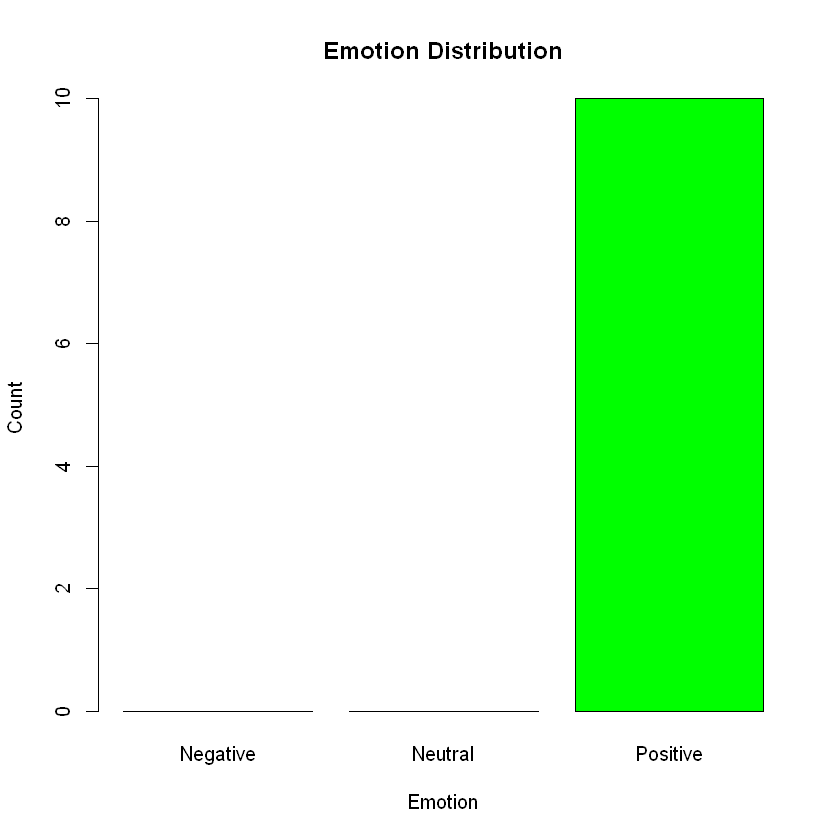

In [25]:
# Visualize emotions using a bar graph
emotion_counts <- table(reviews_df$Emotion)
barplot(emotion_counts, main = "Emotion Distribution", col = c("red", "grey", "green"), xlab = "Emotion", ylab = "Count")